Bayesian A/B Testing
======

In [1]:
import scipy.stats as stats
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

# The parameters are the bounds of the Uniform.
with pm.Model() as model:
    p = pm.Uniform('p', lower=0, upper=1)

A similar anaylsis can be done for site B's response data to determine the analogous $p_B$. But what we are really interested in is the *difference* between $p_A$ and $p_B$. Let's infer $p_A$, $p_B$, *and* $\text{delta} = p_A - p_B$, all at once. We can do this using PyMC3's deterministic variables. (We'll assume for this exercise that $p_B = 0.04$, so $\text{delta} = 0.01$, $N_B = 750$ (signifcantly less than $N_A$) and we will simulate site B's data like we did for site A's data )

In [2]:
import pymc3 as pm
figsize(12, 4)

#these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

#generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0] ...


In [3]:
print(np.mean(observations_A))
print(np.mean(observations_B))

0.048666666666666664
0.036


In [4]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:
    p_A = pm.Normal("p_A", 0.05, 0.025)
    p_B = pm.Uniform("p_B", 0.01, 0.10)
    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    trace = pm.sample(10000, tune=1000, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_B, p_A]
Sampling 2 chains: 100%|██████████| 22000/22000 [00:11<00:00, 1999.36draws/s]


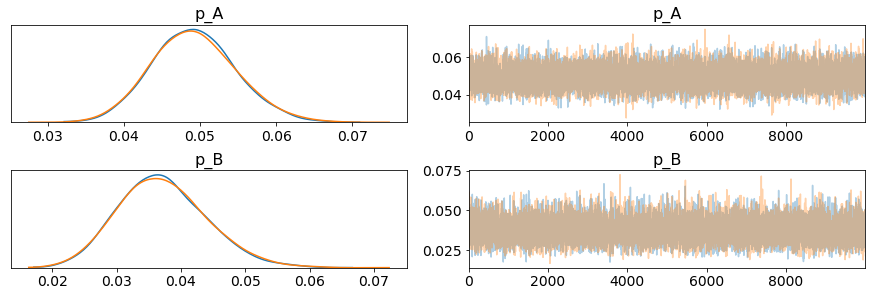

In [5]:
pm.plot_trace(trace);

In [6]:
np.mean((trace['p_A'] - trace['p_B']) > 0)

0.91275